In [18]:
#Importing libraries

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
from scipy.optimize import curve_fit
from astropy import constants as const
from uncertainties import *

In [19]:
#Reading data

tab23 = pd.read_csv('data/tab23.csv')

In [20]:
#Calculations

# Nastavení funkce reprezentující elipsu
def func(xy, a, b):
    x, y = xy
    return ((x / a) ** 2 + (y / b) ** 2 - 1)

# Převod dat do numpy polí
xdata = tab23['x']
ydata = tab23['y']

# Aproximace dat
popt, pcov = curve_fit(func, (xdata, ydata), np.zeros_like(xdata))

# Výpis hodnot parametrů a a b
b, a = popt
print("a =", a / 2)
print("b =", b / 2)


dxdata = tab23['dx']
dydata = tab23['dy']

popt, pcov = curve_fit(func, (dxdata, dydata), np.zeros_like(dxdata))

d, c = popt
print("c =", c / 2)
print("d =", d / 2)

teta = np.linspace(0, 2 * np.pi, num=30)

e = np.sqrt(1 - ((b/2)/(a/2))**2)
print(e)
phi = math.radians(-62)

r = (a * (1 - e**2) / (1 - e * np.cos(teta))) / 2 

r_array = np.array(r)
x_r_array = np.array(r * np.cos(teta))
y_r_array = np.array(r * np.sin(teta))

rotated_x = []
rotated_y = []

rotation_matrix = [[math.cos(phi), -math.sin(phi)], [math.sin(phi), math.cos(phi)]]
rotated_x.append(x_r_array  * rotation_matrix[0][0] + y_r_array * rotation_matrix[0][1])
rotated_y.append(x_r_array  * rotation_matrix[1][0] + y_r_array * rotation_matrix[1][1])

np.savetxt('data-output/rotated_x.csv', rotated_x, delimiter=',')
np.savetxt('data-output/rotated_y.csv', rotated_y, delimiter=',')

a = 0.11583826071758757
b = 0.05509130731133761
c = 0.004882917845201158
d = 0.0032297427655576813
0.8796680540548203


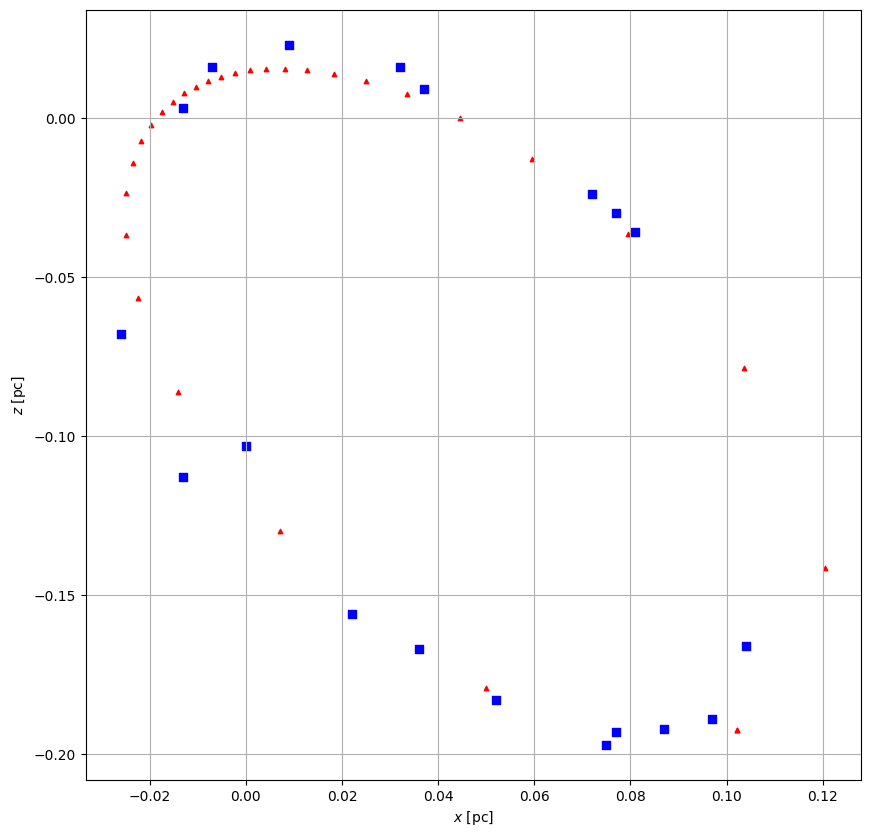

(2.21+/-0.16)e+28
33.7+/-2.4
(4.6+/-1.3)e+36 s2 kg / m3
11.20601572080377
400228.93448625127
302624.6737010111
1.0233926666666665e-25


In [21]:
#Plotting

fig, ax = plt.subplots(figsize=(10,10))

ax.grid('Positions of the stars from table 18')
ax.set_title('')

ax.title.set_fontsize(20)
ax.set_xlabel('$x$ [pc]')
ax.xaxis.label.set_fontsize(10)
ax.set_ylabel('$z$ [pc]')
ax.yaxis.label.set_fontsize(10)

ax.scatter(xdata, ydata,
           s=30, c='blue', marker="s")
ax.scatter(rotated_x, rotated_y,
           s=10, c='red', marker="^",)

plt.show() 
fig.savefig('plots/tab18pos1.png', bbox_inches='tight') 

a_uns = ufloat(a/2 * 41, c/2 * 41)
b_uns = ufloat(b/2 * 41, d/2 * 41)

S_el_m = np.pi * a_uns * 2.56 * 10 ** (13) * b_uns * 2.56 * 10 ** (13)
S_el_ld = np.pi * a_uns * b_uns

print(S_el_m)
print(S_el_ld)

P = ufloat(15.238 * 365.25 * 24 * 60 * 60, 2.116 * 365.25 * 24 * 60 * 60)

M = (4 * np.pi**2 * (a/2 * 41 * 2.56 * 10 ** (13))**3) / (const.G * P**2)
print(M)

u_1 = np.sqrt((2 * 6.6743 * 10**(-11) * 6 * 10**(24)) / (6378 * 10 **(3)))
u_2 = np.sqrt((2 * 6.6743 * 10**(-11) * 6 * 10**(24)) / (0.5 * 10 **(-2)))
u_3 = np.sqrt((2 * 6.6743 * 10**(-11) * 2200* 1.989 * 10**(30)) / (6378 * 10 **(3)))

print(u_1 * 10**(-3))
print(u_2 * 10**(-3))
print(u_3 * 10**(-3))

print((2*6.6743 * 10**(-11)*69) / (3*10**8)**2)